In [3]:
import pandas as pd
from rdkit import Chem
import seaborn as sns
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# drop the rest 
keep_cols_all = ["CANONICAL_SMILES", "INCHIKEY", "active", "dataset", "data_type", "common_name", "action_type"]

# ChEMBL

In [5]:
chembl_actives = pd.read_csv("processed/chembl_active.csv")
chembl_actives.head()

,CANONICAL_SMILES,INCHIKEY,common_name,action_type,dataset,active
0,Clc1ccc2nsnc2c1NC1=NCCN1,XFYDIVBRZNQMJC-UHFFFAOYSA-N,TIZANIDINE,substrate,ChEMBL_curated,True
1,Cn1c(=O)c2[nH]cnc2n(C)c1=O,ZFXYFBGIUFBOJW-UHFFFAOYSA-N,THEOPHYLLINE,substrate,ChEMBL_curated,True
2,Nc1c2c(nc3ccccc13)CCCC2,YLJREFDVOIBQDA-UHFFFAOYSA-N,TACRINE,substrate,ChEMBL_curated,True
3,CCOc1ccc(NC(C)=O)cc1,CPJSUEIXXCENMM-UHFFFAOYSA-N,PHENACETIN,substrate,ChEMBL_curated,True
4,CCOc1ccc2nc3ccc(=O)cc-3oc2c1,CRCWUBLTFGOMDD-UHFFFAOYSA-N,ETHOXYRESORUFIN,substrate,ChEMBL_curated,True


# FDA approved

In [6]:
fda = pd.read_csv("processed/fda.csv")

In [7]:
fda

,SMILES,active,common_name,action_type,FDA_recommended,CANONICAL_SMILES,INCHIKEY,dataset
0,CCOc1ccc2nc3ccc(=O)cc-3oc2c1,True,ethoxyresorufin,substrate,True,CCOc1ccc2nc3ccc(=O)cc-3oc2c1,CRCWUBLTFGOMDD-UHFFFAOYSA-N,FDA
1,CCOc1ccc(NC(C)=O)cc1,True,phenacetin,substrate,True,CCOc1ccc(NC(C)=O)cc1,CPJSUEIXXCENMM-UHFFFAOYSA-N,FDA
2,Cn1c(=O)c2c(ncn2C)n(C)c1=O,True,caffeine,substrate,True,Cn1c(=O)c2c(ncn2C)n(C)c1=O,RYYVLZVUVIJVGH-UHFFFAOYSA-N,FDA
3,Clc1ccc2nsnc2c1NC1=NCCN1,True,tizanidine,substrate,True,Clc1ccc2nsnc2c1NC1=NCCN1,XFYDIVBRZNQMJC-UHFFFAOYSA-N,FDA


# FLOCKHART

In [13]:
flockhart = pd.read_csv("./processed/flockheart.csv")
flockhart.drop(columns="SMILES", inplace=True)

In [16]:
flockhart

,active,common_name,action_type,CANONICAL_SMILES,INCHIKEY,dataset
0,True,ALOSETRON,substrate,Cc1[nH]cnc1CN1CCc2c(c3ccccc3n2C)C1=O,JSWZEAMFRNKZNL-UHFFFAOYSA-N,flockheart
1,True,CAFFEINE,substrate,Cn1c(=O)c2c(ncn2C)n(C)c1=O,RYYVLZVUVIJVGH-UHFFFAOYSA-N,flockheart
2,True,CLOMIPRAMINE,substrate,CN(C)CCCN1c2ccccc2CCc2ccc(Cl)cc21,GDLIGKIOYRNHDA-UHFFFAOYSA-N,flockheart
3,True,CLOZAPINE,substrate,CN1CCN(C2=Nc3cc(Cl)ccc3Nc3ccccc32)CC1,QZUDBNBUXVUHMW-UHFFFAOYSA-N,flockheart
4,True,CYCLOBENZAPRINE,substrate,CN(C)CCC=C1c2ccccc2C=Cc2ccccc21,JURKNVYFZMSNLP-UHFFFAOYSA-N,flockheart
5,True,DULOXETINE,substrate,CNCC[C@H](Oc1cccc2ccccc12)c1cccs1,ZEUITGRIYCTCEM-KRWDZBQOSA-N,flockheart
6,True,ESTRADIOL,substrate,C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CC[C...,VOXZDWNPVJITMN-ZBRFXRBCSA-N,flockheart
7,True,FLUVOXAMINE,substrate,COCCCC/C(=N\OCCN)c1ccc(C(F)(F)F)cc1,CJOFXWAVKWHTFT-XSFVSMFZSA-N,flockheart
8,True,HALOPERIDOL,substrate,O=C(CCCN1CCC(O)(c2ccc(Cl)cc2)CC1)c1ccc(F)cc1,LNEPOXFFQSENCJ-UHFFFAOYSA-N,flockheart
9,True,IMIPRAMINE,substrate,CN(C)CCCN1c2ccccc2CCc2ccccc21,BCGWQEUPMDMJNV-UHFFFAOYSA-N,flockheart


# DRUGBANK

In [17]:
drugbank = pd.read_csv("./processed/drugbank.csv")
drugbank.drop(columns="SMILES", inplace=True)

In [18]:
drugbank

,active,common_name,action_type,CANONICAL_SMILES,INCHIKEY,dataset
0,True,Acenocoumarol,substrate,CC(=O)CC(c1ccc([N+](=O)[O-])cc1)c1c(O)c2ccccc2...,VABCILAOYCMVPS-UHFFFAOYSA-N,drugbank
1,True,Aminophylline,substrate,Cn1c(=O)c2[nH]cnc2n(C)c1=O,ZFXYFBGIUFBOJW-UHFFFAOYSA-N,drugbank
2,True,Betaxolol,substrate,CC(C)NCC(O)COc1ccc(CCOCC2CC2)cc1,NWIUTZDMDHAVTP-UHFFFAOYSA-N,drugbank
3,True,True,substrate,Cn1c(=O)c2c(ncn2C)n(C)c1=O,RYYVLZVUVIJVGH-UHFFFAOYSA-N,drugbank
4,True,Clomipramine,substrate,CN(C)CCCN1c2ccccc2CCc2ccc(Cl)cc21,GDLIGKIOYRNHDA-UHFFFAOYSA-N,drugbank
5,True,Clozapine,substrate,CN1CCN(C2=Nc3cc(Cl)ccc3Nc3ccccc32)CC1,QZUDBNBUXVUHMW-UHFFFAOYSA-N,drugbank
6,True,Cyclobenzaprine,substrate,CN(C)CCC=C1c2ccccc2C=Cc2ccccc21,JURKNVYFZMSNLP-UHFFFAOYSA-N,drugbank
7,True,Dacarbazine,substrate,CN(C)N=Nc1[nH]cnc1C(N)=O,FDKXTQMXEQVLRF-UHFFFAOYSA-N,drugbank
8,True,Doxepin,substrate,CN(C)CCC=C1c2ccccc2COc2ccccc21,ODQWQRRAPPTVAG-UHFFFAOYSA-N,drugbank
9,True,Duloxetine,substrate,CNCC[C@H](Oc1cccc2ccccc12)c1cccs1,ZEUITGRIYCTCEM-KRWDZBQOSA-N,drugbank


# Combine everything

In [19]:
combined_literature = pd.concat([drugbank, fda, flockhart, chembl_actives])
combined_literature

,active,common_name,action_type,CANONICAL_SMILES,INCHIKEY,dataset,SMILES,FDA_recommended
0,True,Acenocoumarol,substrate,CC(=O)CC(c1ccc([N+](=O)[O-])cc1)c1c(O)c2ccccc2...,VABCILAOYCMVPS-UHFFFAOYSA-N,drugbank,NaN,NaN
1,True,Aminophylline,substrate,Cn1c(=O)c2[nH]cnc2n(C)c1=O,ZFXYFBGIUFBOJW-UHFFFAOYSA-N,drugbank,NaN,NaN
2,True,Betaxolol,substrate,CC(C)NCC(O)COc1ccc(CCOCC2CC2)cc1,NWIUTZDMDHAVTP-UHFFFAOYSA-N,drugbank,NaN,NaN
3,True,True,substrate,Cn1c(=O)c2c(ncn2C)n(C)c1=O,RYYVLZVUVIJVGH-UHFFFAOYSA-N,drugbank,NaN,NaN
4,True,Clomipramine,substrate,CN(C)CCCN1c2ccccc2CCc2ccc(Cl)cc21,GDLIGKIOYRNHDA-UHFFFAOYSA-N,drugbank,NaN,NaN
...,...,...,...,...,...,...,...,...
3,True,PHENACETIN,substrate,CCOc1ccc(NC(C)=O)cc1,CPJSUEIXXCENMM-UHFFFAOYSA-N,ChEMBL_curated,NaN,NaN
4,True,ETHOXYRESORUFIN,substrate,CCOc1ccc2nc3ccc(=O)cc-3oc2c1,CRCWUBLTFGOMDD-UHFFFAOYSA-N,ChEMBL_curated,NaN,NaN
5,True,DULOXETINE,substrate,CNCC[C@H](Oc1cccc2ccccc12)c1cccs1,ZEUITGRIYCTCEM-KRWDZBQOSA-N,ChEMBL_curated,NaN,NaN
6,True,CAFFEINE,substrate,Cn1c(=O)c2c(ncn2C)n(C)c1=O,RYYVLZVUVIJVGH-UHFFFAOYSA-N,ChEMBL_curated,NaN,NaN


In [20]:
combined_literature.INCHIKEY.duplicated().sum()  # close same result with SMILES

24

In [21]:
combined_literature.dropna(subset="INCHIKEY", inplace=True)

In [22]:
combined_literature_chembl = combined_literature

In [23]:
combined_literature_chembl.FDA_recommended.value_counts()

FDA_recommended
True    4
Name: count, dtype: int64

In [24]:
combined_literature_chembl.dataset.value_counts()

dataset
flockheart        31
drugbank          27
ChEMBL_curated     8
FDA                4
Name: count, dtype: int64

In [25]:
combined_literature_chembl.INCHIKEY.duplicated().sum()

24

In [26]:
combined_literature_chembl.INCHIKEY.isna().sum()

0

In [27]:
combined_literature_chembl

,active,common_name,action_type,CANONICAL_SMILES,INCHIKEY,dataset,SMILES,FDA_recommended
0,True,Acenocoumarol,substrate,CC(=O)CC(c1ccc([N+](=O)[O-])cc1)c1c(O)c2ccccc2...,VABCILAOYCMVPS-UHFFFAOYSA-N,drugbank,NaN,NaN
1,True,Aminophylline,substrate,Cn1c(=O)c2[nH]cnc2n(C)c1=O,ZFXYFBGIUFBOJW-UHFFFAOYSA-N,drugbank,NaN,NaN
2,True,Betaxolol,substrate,CC(C)NCC(O)COc1ccc(CCOCC2CC2)cc1,NWIUTZDMDHAVTP-UHFFFAOYSA-N,drugbank,NaN,NaN
3,True,True,substrate,Cn1c(=O)c2c(ncn2C)n(C)c1=O,RYYVLZVUVIJVGH-UHFFFAOYSA-N,drugbank,NaN,NaN
4,True,Clomipramine,substrate,CN(C)CCCN1c2ccccc2CCc2ccc(Cl)cc21,GDLIGKIOYRNHDA-UHFFFAOYSA-N,drugbank,NaN,NaN
...,...,...,...,...,...,...,...,...
3,True,PHENACETIN,substrate,CCOc1ccc(NC(C)=O)cc1,CPJSUEIXXCENMM-UHFFFAOYSA-N,ChEMBL_curated,NaN,NaN
4,True,ETHOXYRESORUFIN,substrate,CCOc1ccc2nc3ccc(=O)cc-3oc2c1,CRCWUBLTFGOMDD-UHFFFAOYSA-N,ChEMBL_curated,NaN,NaN
5,True,DULOXETINE,substrate,CNCC[C@H](Oc1cccc2ccccc12)c1cccs1,ZEUITGRIYCTCEM-KRWDZBQOSA-N,ChEMBL_curated,NaN,NaN
6,True,CAFFEINE,substrate,Cn1c(=O)c2c(ncn2C)n(C)c1=O,RYYVLZVUVIJVGH-UHFFFAOYSA-N,ChEMBL_curated,NaN,NaN


In [28]:
appears = combined_literature_chembl.groupby("INCHIKEY")["dataset"].nunique().reset_index(name="appears_in_N_datasets")
appears.set_index("INCHIKEY")

,appears_in_N_datasets
INCHIKEY,
AQHHHDLHHXJYJD-UHFFFAOYSA-N,2
BCGWQEUPMDMJNV-UHFFFAOYSA-N,1
BLXXJMDCKKHMKV-UHFFFAOYSA-N,1
CJOFXWAVKWHTFT-XSFVSMFZSA-N,2
CMWTZPSULFXXJA-UHFFFAOYSA-N,1
CPJSUEIXXCENMM-UHFFFAOYSA-N,3
CRCWUBLTFGOMDD-UHFFFAOYSA-N,2
DNXHEGUUPJUMQT-CBZIJGRNSA-N,1
DRLFMBDRBRZALE-UHFFFAOYSA-N,1


In [29]:
appears.isna().sum()

INCHIKEY                 0
appears_in_N_datasets    0
dtype: int64

<Axes: xlabel='appears_in_N_datasets', ylabel='count'>

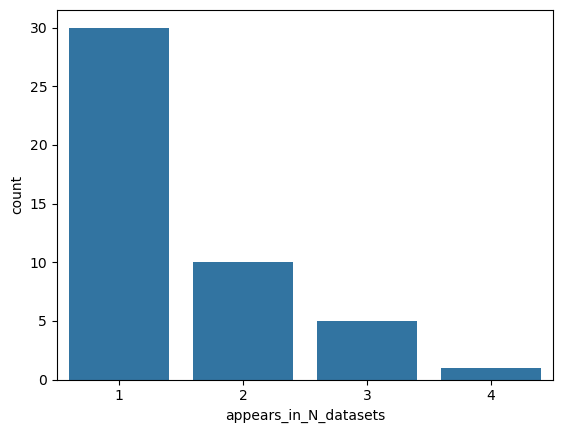

In [30]:
sns.countplot(data=appears, x="appears_in_N_datasets")

In [31]:
combined_literature_chembl_w_counts = combined_literature_chembl.merge(appears, on="INCHIKEY")
combined_literature_chembl_w_counts

,active,common_name,action_type,CANONICAL_SMILES,INCHIKEY,dataset,SMILES,FDA_recommended,appears_in_N_datasets
0,True,Acenocoumarol,substrate,CC(=O)CC(c1ccc([N+](=O)[O-])cc1)c1c(O)c2ccccc2...,VABCILAOYCMVPS-UHFFFAOYSA-N,drugbank,NaN,NaN,1
1,True,Aminophylline,substrate,Cn1c(=O)c2[nH]cnc2n(C)c1=O,ZFXYFBGIUFBOJW-UHFFFAOYSA-N,drugbank,NaN,NaN,3
2,True,Theophylline,substrate,Cn1c(=O)c2[nH]cnc2n(C)c1=O,ZFXYFBGIUFBOJW-UHFFFAOYSA-N,drugbank,NaN,NaN,3
3,True,THEOPHYLLINE,substrate,Cn1c(=O)c2[nH]cnc2n(C)c1=O,ZFXYFBGIUFBOJW-UHFFFAOYSA-N,flockheart,NaN,NaN,3
4,True,THEOPHYLLINE,substrate,Cn1c(=O)c2[nH]cnc2n(C)c1=O,ZFXYFBGIUFBOJW-UHFFFAOYSA-N,ChEMBL_curated,NaN,NaN,3
...,...,...,...,...,...,...,...,...,...
65,True,TASIMELTEON,substrate,CCC(=O)NC[C@@H]1C[C@H]1c1cccc2c1CCO2,PTOIAAWZLUQTIO-GXFFZTMASA-N,flockheart,NaN,NaN,1
66,True,TRIAMTERENE,substrate,Nc1nc(N)c2nc(-c3ccccc3)c(N)nc2n1,FNYLWPVRPXGIIP-UHFFFAOYSA-N,flockheart,NaN,NaN,1
67,True,WARFARIN,substrate,CC(=O)CC(c1ccccc1)c1c(O)c2ccccc2oc1=O,PJVWKTKQMONHTI-UHFFFAOYSA-N,flockheart,NaN,NaN,1
68,True,ZILEUTON,substrate,CC(c1cc2ccccc2s1)N(O)C(N)=O,MWLSOWXNZPKENC-UHFFFAOYSA-N,flockheart,NaN,NaN,1


In [32]:
df_dummies = pd.get_dummies(combined_literature_chembl_w_counts['dataset'], prefix='dataset').join(combined_literature_chembl_w_counts["INCHIKEY"])
df_dummies

,dataset_ChEMBL_curated,dataset_FDA,dataset_drugbank,dataset_flockheart,INCHIKEY
0,False,False,True,False,VABCILAOYCMVPS-UHFFFAOYSA-N
1,False,False,True,False,ZFXYFBGIUFBOJW-UHFFFAOYSA-N
2,False,False,True,False,ZFXYFBGIUFBOJW-UHFFFAOYSA-N
3,False,False,False,True,ZFXYFBGIUFBOJW-UHFFFAOYSA-N
4,True,False,False,False,ZFXYFBGIUFBOJW-UHFFFAOYSA-N
...,...,...,...,...,...
65,False,False,False,True,PTOIAAWZLUQTIO-GXFFZTMASA-N
66,False,False,False,True,FNYLWPVRPXGIIP-UHFFFAOYSA-N
67,False,False,False,True,PJVWKTKQMONHTI-UHFFFAOYSA-N
68,False,False,False,True,MWLSOWXNZPKENC-UHFFFAOYSA-N


In [33]:
df_result = df_dummies.groupby('INCHIKEY').max().reset_index()
df_result = df_result.set_index("INCHIKEY")

In [34]:

combined_literature_chembl_w_counts = combined_literature_chembl_w_counts.merge(df_result, on="INCHIKEY")
combined_literature_chembl_w_counts

,active,common_name,action_type,CANONICAL_SMILES,INCHIKEY,dataset,SMILES,FDA_recommended,appears_in_N_datasets,dataset_ChEMBL_curated,dataset_FDA,dataset_drugbank,dataset_flockheart
0,True,Acenocoumarol,substrate,CC(=O)CC(c1ccc([N+](=O)[O-])cc1)c1c(O)c2ccccc2...,VABCILAOYCMVPS-UHFFFAOYSA-N,drugbank,NaN,NaN,1,False,False,True,False
1,True,Aminophylline,substrate,Cn1c(=O)c2[nH]cnc2n(C)c1=O,ZFXYFBGIUFBOJW-UHFFFAOYSA-N,drugbank,NaN,NaN,3,True,False,True,True
2,True,Theophylline,substrate,Cn1c(=O)c2[nH]cnc2n(C)c1=O,ZFXYFBGIUFBOJW-UHFFFAOYSA-N,drugbank,NaN,NaN,3,True,False,True,True
3,True,THEOPHYLLINE,substrate,Cn1c(=O)c2[nH]cnc2n(C)c1=O,ZFXYFBGIUFBOJW-UHFFFAOYSA-N,flockheart,NaN,NaN,3,True,False,True,True
4,True,THEOPHYLLINE,substrate,Cn1c(=O)c2[nH]cnc2n(C)c1=O,ZFXYFBGIUFBOJW-UHFFFAOYSA-N,ChEMBL_curated,NaN,NaN,3,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,True,TASIMELTEON,substrate,CCC(=O)NC[C@@H]1C[C@H]1c1cccc2c1CCO2,PTOIAAWZLUQTIO-GXFFZTMASA-N,flockheart,NaN,NaN,1,False,False,False,True
66,True,TRIAMTERENE,substrate,Nc1nc(N)c2nc(-c3ccccc3)c(N)nc2n1,FNYLWPVRPXGIIP-UHFFFAOYSA-N,flockheart,NaN,NaN,1,False,False,False,True
67,True,WARFARIN,substrate,CC(=O)CC(c1ccccc1)c1c(O)c2ccccc2oc1=O,PJVWKTKQMONHTI-UHFFFAOYSA-N,flockheart,NaN,NaN,1,False,False,False,True
68,True,ZILEUTON,substrate,CC(c1cc2ccccc2s1)N(O)C(N)=O,MWLSOWXNZPKENC-UHFFFAOYSA-N,flockheart,NaN,NaN,1,False,False,False,True


In [35]:
combined_literature_chembl_w_counts.action_type.value_counts()

action_type
substrate    70
Name: count, dtype: int64

In [36]:
combined_literature_chembl_w_counts.INCHIKEY.nunique()

46

In [37]:
combined_literature_chembl_w_counts['common_name'].isna().sum()

0

In [38]:
# we can just sort by N_datasets as no specific chembl curation to get all the chembl data at the top, then uniquify on INCHIKEY

combined_literature_chembl_w_counts.sort_values(["appears_in_N_datasets"], ascending=[False],  inplace=True)

In [39]:
# fill common name from gropupby 
combined_literature_chembl_w_counts['common_name'] = combined_literature_chembl_w_counts.groupby('INCHIKEY')['common_name'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

In [40]:
combined_literature_chembl_w_counts['common_name'].isna().sum()

0

In [42]:
combined_literature_chembl_w_counts["inclusion_score"] = combined_literature_chembl_w_counts["appears_in_N_datasets"].fillna(0)


In [43]:
combined_literature_chembl_w_counts.sort_values("inclusion_score", ascending=False, inplace=True)


In [44]:
combined_literature_chembl_w_counts.to_csv("final/actives_final.csv", index=False)


In [45]:
combined_literature_chembl_w_counts


,active,common_name,action_type,CANONICAL_SMILES,INCHIKEY,dataset,SMILES,FDA_recommended,appears_in_N_datasets,dataset_ChEMBL_curated,dataset_FDA,dataset_drugbank,dataset_flockheart,inclusion_score
6,True,True,substrate,Cn1c(=O)c2c(ncn2C)n(C)c1=O,RYYVLZVUVIJVGH-UHFFFAOYSA-N,drugbank,NaN,NaN,4,True,True,True,True,4
8,True,CAFFEINE,substrate,Cn1c(=O)c2c(ncn2C)n(C)c1=O,RYYVLZVUVIJVGH-UHFFFAOYSA-N,flockheart,NaN,NaN,4,True,True,True,True,4
9,True,CAFFEINE,substrate,Cn1c(=O)c2c(ncn2C)n(C)c1=O,RYYVLZVUVIJVGH-UHFFFAOYSA-N,ChEMBL_curated,NaN,NaN,4,True,True,True,True,4
7,True,caffeine,substrate,Cn1c(=O)c2c(ncn2C)n(C)c1=O,RYYVLZVUVIJVGH-UHFFFAOYSA-N,FDA,Cn1c(=O)c2c(ncn2C)n(C)c1=O,True,4,True,True,True,True,4
50,True,TIZANIDINE,substrate,Clc1ccc2nsnc2c1NC1=NCCN1,XFYDIVBRZNQMJC-UHFFFAOYSA-N,flockheart,NaN,NaN,3,True,True,False,True,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,True,PIRFENIDONE,substrate,Cc1ccc(=O)n(-c2ccccc2)c1,ISWRGOKTTBVCFA-UHFFFAOYSA-N,flockheart,NaN,NaN,1,False,False,False,True,1
67,True,WARFARIN,substrate,CC(=O)CC(c1ccccc1)c1c(O)c2ccccc2oc1=O,PJVWKTKQMONHTI-UHFFFAOYSA-N,flockheart,NaN,NaN,1,False,False,False,True,1
68,True,ZILEUTON,substrate,CC(c1cc2ccccc2s1)N(O)C(N)=O,MWLSOWXNZPKENC-UHFFFAOYSA-N,flockheart,NaN,NaN,1,False,False,False,True,1
66,True,TRIAMTERENE,substrate,Nc1nc(N)c2nc(-c3ccccc3)c(N)nc2n1,FNYLWPVRPXGIIP-UHFFFAOYSA-N,flockheart,NaN,NaN,1,False,False,False,True,1


In [46]:
combined_literature_chembl_w_counts["inclusion_score"] = combined_literature_chembl_w_counts["inclusion_score"].astype(int)


<Axes: xlabel='inclusion_score', ylabel='count'>

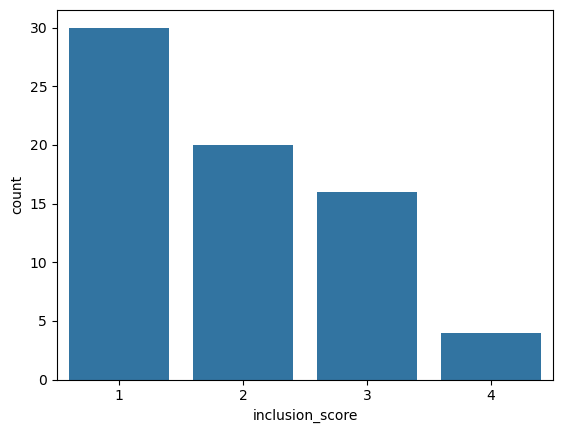

In [47]:
sns.countplot(combined_literature_chembl_w_counts, x="inclusion_score")
